# MSIS Python Final Project

### Team Members:
<b> <ol>
<p>Yu Liu (W1382635)</p>
<p>Fui Sim Yap (W1449203)</p>
</ol> </b>


In [86]:
import xlrd
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# <u>1. Data Set Description <u>

<b> df </b>is a dataset containing information of all the athletes. Each row is a participation.

Important columns in <b> df </b> are:
<ol>
<li> ID : Unique participation</li>
<li> Name : Athlete's name </li>
<li> Sex : Female or Male </li>
<li> Age : Integer </li>    
<li> Height : In centimeters </li>
<li> Weight : In kilograms </li>
<li> Team : Team name </li>
<li> NOC : National Olympic Committee 3-letter code</li>
<li> Games : Year and season</li>
<li> Year : Integer</li>
<li> Season : Summer or Winter.</li>
<li> City : Host city.</li>
<li> Medal : Gold, Silver, Bronze, or NA </li>

</ol>

In [87]:
df = pd.read_csv("athlete_events.csv")

In [88]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## <u> Interesting Finding 1 </u>

### Data Preparation and Cleaning for Finding 1:

In [89]:
df2=df.copy()
df2.dropna(inplace=True)
df2 = df2[df2.Season == 'Winter']
df2.groupby('Sport')['ID'].count().sort_values(ascending=False)

Sport
Ice Hockey                   1283
Cross Country Skiing          687
Speed Skating                 488
Biathlon                      388
Alpine Skiing                 354
Bobsleigh                     283
Short Track Speed Skating     274
Figure Skating                247
Luge                          178
Ski Jumping                   175
Nordic Combined               137
Curling                       131
Freestyle Skiing              102
Snowboarding                   89
Skeleton                       24
Name: ID, dtype: int64

Check the percentage of Ice Hockey events in the list of all winning Winter events:

In [90]:
(df2.ID[df.Sport == 'Ice Hockey'].count())/len(df2)

0.26508264462809916

In [91]:
ihockeyDf =df2.copy()

In [92]:
ihockeyDf['SexNum'] = ihockeyDf['Sex'].apply(lambda x: 0 if x == 'M' else 1)
ihockeyDf['isIHockey'] = ihockeyDf['Sport'].apply(lambda x: 'IceHockey' if x == 'Ice Hockey' else 'Others')
#ihockeyDf.dropna(inplace = True)
ihockeyDf.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,SexNum,isIHockey
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,0,IceHockey
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,0,Others
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,0,Others
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,0,Others
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,0,Others


In [93]:
ihDf = ihockeyDf.drop(['ID','Name','Sex','Team','NOC','Games','Season','City','Sport','Event','Medal','Year'], axis = 1)

In [94]:
ihDf.head(20)

,Age,Height,Weight,SexNum,isIHockey
40,28.0,184.0,85.0,0,IceHockey
60,20.0,176.0,85.0,0,Others
61,20.0,176.0,85.0,0,Others
63,22.0,176.0,85.0,0,Others
64,22.0,176.0,85.0,0,Others
67,22.0,176.0,85.0,0,Others
73,30.0,176.0,85.0,0,Others
76,30.0,176.0,85.0,0,Others
78,34.0,176.0,85.0,0,Others
278,28.0,175.0,70.0,0,Others


In [95]:
len(ihDf)

4840

### Make X and Y

In [96]:
X = ihDf[['SexNum','Height','Weight','Age']]
Y = ihDf.isIHockey

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [98]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

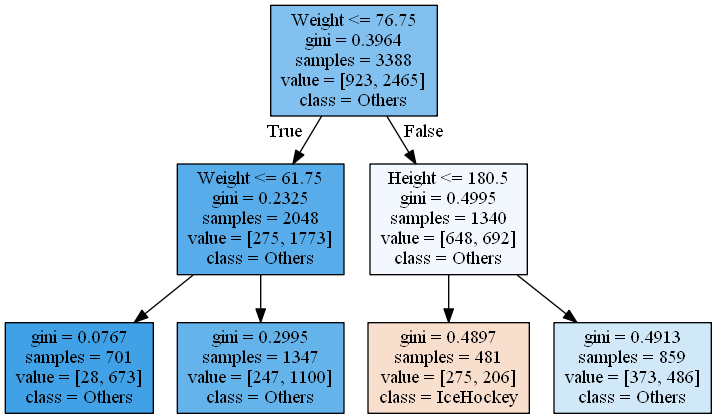

In [99]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [100]:
from sklearn.metrics import accuracy_score
prediction = dt.predict(X_test)
accuracy_score(Y_test, prediction)

0.7603305785123967

### Finding: Based on the decision tree we can see that a height of less than 180.5cm and a weight of greater than 76.75kg would be the ideal characteristics for an Ice Hockey medalist

### Validity of finding 1

In [101]:
ihDf['isIHockey'] = (ihDf.isIHockey == 'IceHockey') * 1
ihDf.head()

,Age,Height,Weight,SexNum,isIHockey
40,28.0,184.0,85.0,0,1
60,20.0,176.0,85.0,0,0
61,20.0,176.0,85.0,0,0
63,22.0,176.0,85.0,0,0
64,22.0,176.0,85.0,0,0


In [102]:
ihDf['binned_height'] = pd.cut(ihDf['Height'],bins=[160,170,180,185,190])

In [103]:
ihDf['weightOver76'] = ihDf['Weight'].apply(lambda x: 1 if x > 76 else 0)

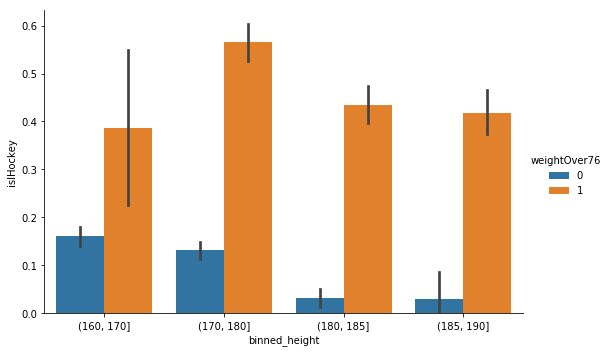

In [104]:
sns.catplot(x='binned_height', y='isIHockey', data=ihDf, kind='bar', hue = 'weightOver76', aspect=1.5)

### The bar graph above shows that a height of between 170-180 has the highest probability of being an Ice Hockey medalist and it is especially effective when the weight is over 76kg.

## <u> Interesting Finding 2 </u>

### Data Preparation and Cleaning for Finding 2:

In [105]:
regDf = df.copy()
regDf.dropna(inplace=True)

In [106]:
regDf.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [107]:
regDf = pd.get_dummies(data=regDf,columns=['Team','NOC','Season'])

In [108]:
regDf['SexNum'] = regDf['Sex'].apply(lambda x: 0 if x == 'M' else 1)
regDf.head()

,ID,Name,Sex,Age,Height,Weight,Games,Year,City,Sport,...,NOC_UZB,NOC_VEN,NOC_VIE,NOC_WIF,NOC_YUG,NOC_ZAM,NOC_ZIM,Season_Summer,Season_Winter,SexNum
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,2014 Winter,2014,Sochi,Ice Hockey,...,0,0,0,0,0,0,0,0,1,0
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,London,Gymnastics,...,0,0,0,0,0,0,0,1,0,0
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,London,Gymnastics,...,0,0,0,0,0,0,0,1,0,0
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,London,Gymnastics,...,0,0,0,0,0,0,0,1,0,0
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,London,Gymnastics,...,0,0,0,0,0,0,0,1,0,0


In [109]:
regDf.drop(['ID','Name','Sex','Games','Year','City','Sport','Event','Medal'],axis=1,inplace=True)

In [110]:
regDf.head()

,Age,Height,Weight,Team_Afghanistan,Team_Algeria,Team_Amateur Athletic Association,Team_Aphrodite,Team_Argentina,Team_Argonaut Rowing Club,Team_Armenia,...,NOC_UZB,NOC_VEN,NOC_VIE,NOC_WIF,NOC_YUG,NOC_ZAM,NOC_ZIM,Season_Summer,Season_Winter,SexNum
40,28.0,184.0,85.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,28.0,175.0,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42,28.0,175.0,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,28.0,175.0,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48,28.0,175.0,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Make X and Y

We want to explain(or predict) age

In [111]:
X = regDf.drop('Age',axis=1)
Y = regDf.Age

### Regression for data exploration

In [112]:
from sklearn import linear_model
regLasso = linear_model.Lasso() 

In [113]:
regLasso.fit(X,Y)  # will give us insights about which attribute are most important

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
X.columns

Index(['Height', 'Weight', 'Team_Afghanistan', 'Team_Algeria',
       'Team_Amateur Athletic Association', 'Team_Aphrodite', 'Team_Argentina',
       'Team_Argonaut Rowing Club', 'Team_Armenia', 'Team_Australasia',
       ...
       'NOC_UZB', 'NOC_VEN', 'NOC_VIE', 'NOC_WIF', 'NOC_YUG', 'NOC_ZAM',
       'NOC_ZIM', 'Season_Summer', 'Season_Winter', 'SexNum'],
      dtype='object', length=411)

In [115]:
regLasso.coef_

array([-0.00651964,  0.0537987 , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [116]:
d={X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns)) }

In [117]:
s=pd.Series(d)

In [118]:
s[s.abs() > 0.0001]

Height   -0.006520
Weight    0.053799
dtype: float64

In [119]:
regLasso.intercept_

22.61933012143281

### Decision Tree Regressor

In [120]:
import sklearn.tree

In [121]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth=2)

In [122]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

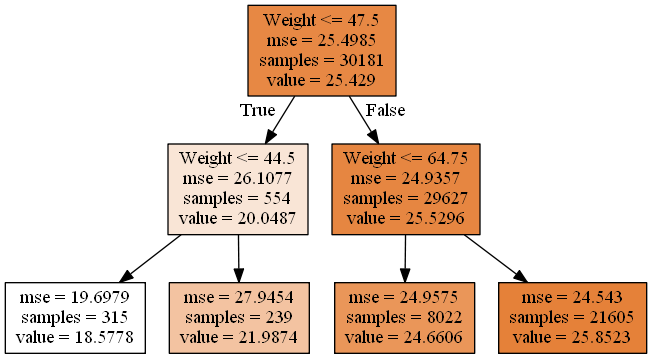

In [123]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### We can see weight is the only attribute that is strongly related to age and that an age of 25 is the threshold for whether or not an athelete will have a weight of more than 64kgs

### Validity of Finding 2

In [124]:
regDf['binned_weight'] = pd.cut(regDf['Weight'],bins=[25,45,65,85,105,125,145,165,185,205])

In [125]:
regDf['binned_age'] = pd.cut(regDf['Age'],bins=[10,15,20,22,25,27,30,32,35,40,45])

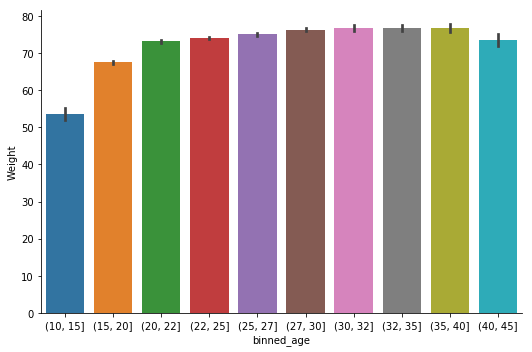

In [126]:
import seaborn as sns
sns.catplot(y='Weight', x='binned_age',data=regDf,kind ='bar',aspect=1.5)

### Weight increases as atheletes age but reaches a maximum peak of around 75kg at ages 30-32. The weight above ages 30-32 remains more or less constant

## <u> Interesting Finding 3 </u>

### Data Preparation and Cleaning for Finding 3:

In [127]:
cleanDf = df.copy()
cleanDf.dropna(inplace=True)
cleanDf.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [128]:
cleanDf = pd.get_dummies(data = cleanDf, columns=['Sex', 'Season'])
cleanDf.head(3)

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,Sex_F,Sex_M,Season_Summer,Season_Winter
40,16,Juhamatti Tapio Aaltonen,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,0,1,0,1
41,17,Paavo Johannes Aaltonen,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,0,1,1,0
42,17,Paavo Johannes Aaltonen,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,0,1,1,0


In [129]:
mainData = cleanDf.drop(['ID','Name','Team','NOC','Games','Year','City','Event','Medal'], axis=1)

In [130]:
mainData2 = mainData.drop(['Sport'], axis = 1)

In [131]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=4)
cl.fit(mainData2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [132]:
mainData2['cluster'] = cl.labels_
mainData2.groupby('cluster').mean()

,Age,Height,Weight,Sex_F,Sex_M,Season_Summer,Season_Winter
cluster,,,,,,,
0,25.698229,183.897722,81.155051,0.123155,0.876845,0.826128,0.173872
1,24.074005,163.588915,55.439735,0.729742,0.270258,0.829664,0.170336
2,25.587396,174.595553,68.320353,0.425908,0.574092,0.832492,0.167508
3,26.554331,193.181272,99.556084,0.030546,0.969454,0.906109,0.093891


In [133]:
res = mainData.copy()
res['cluster'] = cl.labels_

Get the top 5 sports in each cluster

In [134]:
summaryDf = res.groupby('cluster').apply(lambda x: x.groupby('Sport').size().sort_values(ascending=False).head(5))
summaryDf

cluster  Sport     
0        Athletics     1069
         Swimming       905
         Rowing         891
         Ice Hockey     697
         Canoeing       513
1        Gymnastics     918
         Athletics      840
         Swimming       349
         Hockey         337
         Wrestling      322
2        Athletics     1414
         Swimming       938
         Football       594
         Hockey         485
         Fencing        433
3        Rowing         648
         Basketball     454
         Athletics      325
         Water Polo     296
         Handball       295
dtype: int64

### Since some sports (such as Athletics) are quite versatile in a sense that they appear in the top 5 of every cluster, we decided to do our analysis on unique sports that appear in the top 5 of only one cluster

In [135]:
subData = res[(res.Sport == 'Basketball') | (res.Sport == 'Football') | (res.Sport == 'Ice Hockey')| (res.Sport == 'Gymnastics')]
subData['binnedHeight'] = pd.cut(subData['Height'],bins=[145,150,155,160,165,170,175,180,185,190,195,200,205,210,215])

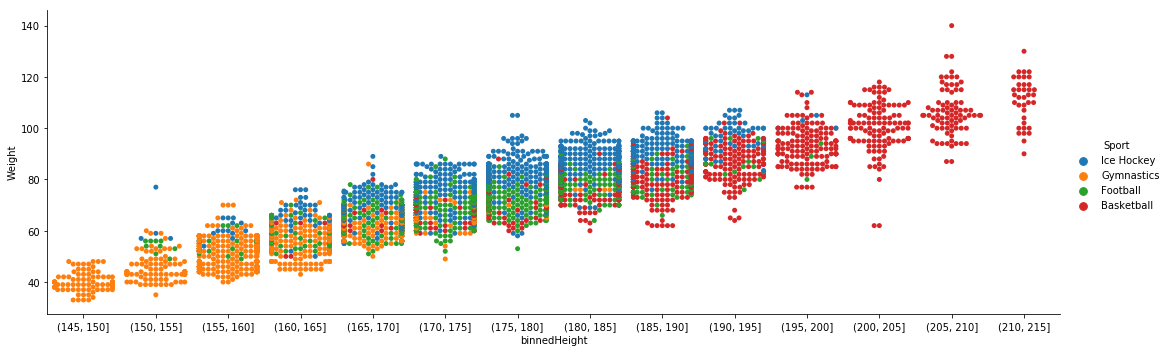

In [136]:
sns.catplot(x='binnedHeight',y='Weight', data=subData, kind='swarm', hue='Sport', aspect=3)

In [137]:
valData = res[(res.Sport == 'Football') | (res.Sport == 'Ice Hockey')]

### We can see the mean weight and height of Ice Hockey and Football players are quite similar, but the difference is that Ice Hockey players tend to be heavier 

### Validity of Finding 3:

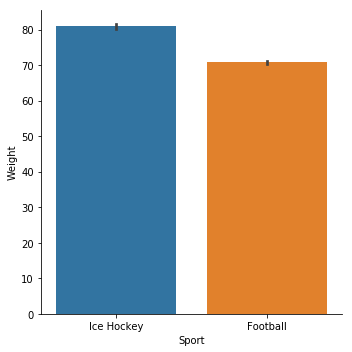

In [138]:
sns.catplot(x='Sport',y='Weight', data=valData, kind='bar', aspect=1)

### Ice hockey athletes are typically heavier than Football athletes based on the graph above

Compare the mean Height and Weight for each of the chosen sport against the mean Height and Weight of the corresponding clusters:

In [139]:
mainData[mainData.Sport == 'Basketball'].mean()

Age               25.297
Height           192.153
Weight            86.692
Sex_F              0.390
Sex_M              0.610
Season_Summer      1.000
Season_Winter      0.000
dtype: float64

In [140]:
mainData[mainData.Sport == 'Ice Hockey'].mean()

Age               25.820907
Height           178.788624
Weight            80.880092
Sex_F              0.230592
Sex_M              0.769408
Season_Summer      0.013836
Season_Winter      0.986164
dtype: float64

In [141]:
mainData[mainData.Sport == 'Football'].mean()

Age               24.221402
Height           175.476015
Weight            70.736162
Sex_F              0.277675
Sex_M              0.722325
Season_Summer      1.000000
Season_Winter      0.000000
dtype: float64

In [142]:
mainData[mainData.Sport == 'Gymnastics'].mean()

Age               21.810508
Height           161.254091
Weight            55.069337
Sex_F              0.437554
Sex_M              0.562446
Season_Summer      1.000000
Season_Winter      0.000000
dtype: float64

In [143]:
mainData2.groupby('cluster').mean()

,Age,Height,Weight,Sex_F,Sex_M,Season_Summer,Season_Winter
cluster,,,,,,,
0,25.698229,183.897722,81.155051,0.123155,0.876845,0.826128,0.173872
1,24.074005,163.588915,55.439735,0.729742,0.270258,0.829664,0.170336
2,25.587396,174.595553,68.320353,0.425908,0.574092,0.832492,0.167508
3,26.554331,193.181272,99.556084,0.030546,0.969454,0.906109,0.093891


## <u> Managerial Insights </u>

Finding 1:
- As a coach, if we were to train a certain athlete on a certain sport, based on the findings, we will be able to determine the ideal body type to train the athletes towards. In the case of finding 1, we know that Ice Hockey medalists tend to have a body height of 180.5cm and a weight of greater than 76.75kg, so for an ice hockey athlete, this would be the ideal body type to strive for.

Finding 2:
- This finding allows us to understand the correlation between the age and weight of olympic medalists. We found out that at the age of 25, athletes are more likely to gain more weight but in order to stay within the competition, they need to have their weight monitored so that it will remain more constant as they age up to 30-40 years old. 

Finding 3:
- Similar to finding one, given a certain body type, coaches can identify which sports may be most suited to that body type, especially for new young athletes who are uncertain of the direction they might go towards. This information would be useful in the case where a certain team has an over-abundance of the respective sports. In this situation, coaches will be able to have a better idea of what other sports might be suitable for these excess athletes. Coaches can also use this finding to find the difference between sports that have similar body types. As shown in the swarm graph above, we can see that football and ice hocket athletes have similar range in height and weight, but we are able to pin point the difference between those two sports by looking at the distribution of the graph (i.e. weight tends to be higher for ice hockey athletes)

Based on these findings, we believe that the information we learned best benefit both coaches and athletes in training to better strategize on how to maximize their probability of winning.